In [1]:
import matplotlib.pyplot as plt
import numpy as np
# helper functions from previous exercise
from lec3ex_helper import f, der_f, FUNC_RANGE, get_tangent_line, plot_it
%matplotlib inline

Here's our familiar function

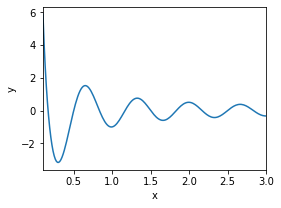

In [2]:
x = np.linspace(*FUNC_RANGE, 200)
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(x,f(x))
plt.xlim(x.min(), x.max());
plt.xlabel('x')
plt.ylabel('y');

Implement learning rate decay and gradient clipping.

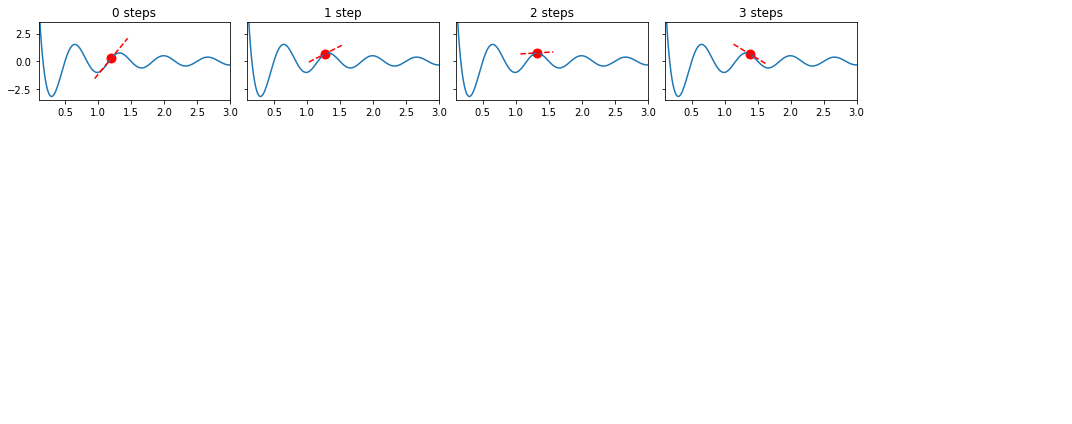

In [5]:
fig, axs = plt.subplots(4,5, figsize=(15,6), sharey=True)

cur_x = 1.2 # initial value of x

learning_rate = 0.01
decay_rate = 0.001 # proportion of learning rate that decays each step
epsilon = 0.025

def clip(g, clip_threshold=8):
    '''return clipped gradient with a magnitude <= clip_threshold'''
    # your code here
    
    if np.linalg.norm(g) > clip_threshold:
        g = (g*clip_threshold) / np.linalg.norm(g)
        
    return g

for i, ax in enumerate(axs.ravel()):
    plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)
    
    prev_x = cur_x # remember what x was
    
    g = clip(der_f(f(prev_x))) # get clipped gradient
    cur_x = prev_x - learning_rate * g # update current x-value
    learning_rate = learning_rate - decay_rate # decay learning rate
    
    # stop algorithm if magnitude of change below epsilon
    if np.abs(cur_x - prev_x) <= epsilon: 
        # hide unused subplots
        for ax in axs.ravel()[i+1:]:
            ax.axis('off') 
        break
plt.tight_layout()

if i == len(axs.ravel())-1:
    print('Did not converge!')